In [6]:
import numpy
from numpy import random
#matplotlib inline
import matplotlib.pyplot as plt

Here we give some example answers to the exrecises provided in the pre-reading. For each question, what we give here is only one POSSIBLE set of answers. There are plenty of other methods or arguments that could also be used to reach similar conclusions. In general the answers we give here are more detailed and thorough than might be expected if you were solving these problems in practice.   [ALE, THIS NEEDS BETTER WORDING]

In [15]:
## Answers to Pre-reading Exercises

## Question 1: apples


##Step 1: simulate a large number of apples.

AverageFallTime=10
numApples=10;
numSamples=10000
Samples= random.exponential(AverageFallTime,[numSamples,numApples])

FirstApple= Samples.min(axis=1)
LastApple=Samples.max(axis=1)

AverageFirstApple=numpy.mean(FirstApple)
AverageLastApple=numpy.mean(LastApple)

print("Mean first apple:",AverageFirstApple)
print("Mean last apple:",AverageLastApple)





Mean first apple: 0.9868431151035234
Mean last apple: 29.27777326754704
analytic total apple time: 29.289682539682538



Analytic treatment. "first apple"

Each apply takes 10 days on average to fall, hence the `rate` of apple dropping is 1/10 per apple.
Time until first apply is minimum of 10 exponential random variables. The minimum of multiple exponential distributions is an exponential distribution with rate equal to the sum of individual rates.
Hence:
$$\lambda_{min}= \frac{1}{10}+\frac{1}{10}+...\frac{1}{10}=\frac{10}{10}=1$$
The mean time until first apple is thus 1 day. This matches our simulations.


Finding out the expected time until *all* the apples drop takes a little more work. In order to determine this, it is useful to first consider `how long until the *second* apple drops?`. After the first apple drops, there are nine apples remaining, and hence the time between the first and second apple is an exponential random variable with rate 9/10 apples per day. Thus, the expected time for between the first and second apples is 10/9 days.

The total time for two apples to drop is hence $1 day+ 10/9 days$ days.

Similar working can be used to determine the time until the 3rd, 4th etc apples drop, with the rate of apples falling steadily decreasing.

This leads to:
$$ \lambda_{10->9}= \frac{10}{10} , \lambda_{9->8}= \frac{9}{10}, \lambda_{8->7}= \frac{8}{10} ,...\lambda_{1->0}= \frac{1}{10}$$

$$ E(T_{10->9})= \frac{10}{10} , E(T_{9->8})= \frac{10}{9}, E(T_{8->7})= \frac{10}{9} ,...E(T_{1->0})= \frac{10}{1}$$

$$ E(T_{10->0})= \sum \left[\frac{10}{10}+\frac{10}{9}+\frac{10}{8}+...+\frac{10}{1} \right] \approx 29.2897$$

Hence, the expected time for all apples to drop is roughly 29.3days. This matches the observed results from simulations.


Question 2: **Is the weather a Markov Chain**

In the pre-reading, we gave weather systems as examples of continuous time Markov chain with discrete states.
This inevitably leads to the question other weather of not this is a GOOD model of the weather... and the answer is... it depends.

If you are planning predict the weather across an entire year, then naturally the cycles of summer and winter, wet season and dry are going to have a significant impact on how the weather behaves at any given time: the system is NOT memoryless, because it remembers that it has been 6 weeks since the height of summer.
On a day by day basis, the time of day is going to effect the weather: in some places you can set your clock by when to expect the afternoon rains, while in others rain and sunshine might flip flop back and forward in a much less predictable manner. Even so the sky only has a finite amount of water: the longer a downpour has been going, the more likely it is to end, simple because at some point the sky will have poured down every last drop of water.

There are other systems for which Markov chains are a much better model... however these systems are often much less familiar, and far more technical (examples include signals passing through an internet central router).


*AJL: Ale- this explain doesn't feel great. Do you have anything to add?*


In [42]:
#Question 3: biased random walks

Samples=1000;  #This is the number of samples.
Wins=0
sss=0;

while( sss<Samples):
    pos=0; #Current position
    
    while((pos>-5)&(pos<10)): #Continue running the simulation as long as we are in bounds.
        if(random.rand()<0.4): ##Flip a BIASED coin. 40% of the time we go 3 steps up.
            pos=pos+3;
        else:   ##The rest of the time we go two steps down.
            pos=pos-2;
    
    ##End of inner while loop.
    
    if(pos<=-5):
        Wins=Wins+1; #we have reached -5 BEFORE +10
    
    sss=sss+1
    
##End of outer loop.

    
print("We hit -5 before +10 in ", Wins," out of ",Samples," simulations" )



We hit -5 before +10 in  6630  out of  10000  simulations


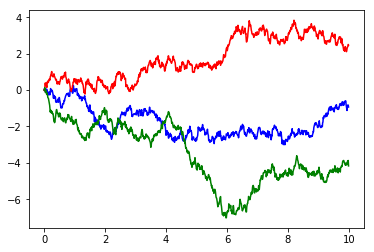

In [66]:
#   Question 4: produce a brownian motion.

NumberOfSteps=1000;

randomNormals=random.randn(NumberOfSteps)
PositionArray=numpy.zeros(NumberOfSteps);
TimeArray=numpy.zeros(NumberOfSteps);

currentSteps=1;


dt=0.01;

while currentSteps<NumberOfSteps:
  
    PositionArray[currentSteps]=PositionArray[currentSteps-1] + (randomNormals[currentSteps])*numpy.math.sqrt(dt);
    TimeArray[currentSteps]=TimeArray[currentSteps-1] + dt;
    currentSteps+=1


##Once you've created a random walk (or other algorithm) you might want to display it
plt.plot(TimeArray,PositionArray,'-b')







randomNormals=random.randn(NumberOfSteps)
currentSteps=1;

while currentSteps<NumberOfSteps:
  
    PositionArray[currentSteps]=PositionArray[currentSteps-1] + (randomNormals[currentSteps])*numpy.math.sqrt(dt);
    TimeArray[currentSteps]=TimeArray[currentSteps-1] + dt;
    currentSteps+=1


##Once you've created a random walk (or other algorithm) you might want to display it
plt.plot(TimeArray,PositionArray,'-r')






randomNormals=random.randn(NumberOfSteps)
currentSteps=1;

while currentSteps<NumberOfSteps:
  
    PositionArray[currentSteps]=PositionArray[currentSteps-1] + (randomNormals[currentSteps])*numpy.math.sqrt(dt);
    TimeArray[currentSteps]=TimeArray[currentSteps-1] + dt;
    currentSteps+=1


##Once you've created a random walk (or other algorithm) you might want to display it
plt.plot(TimeArray,PositionArray,'-g')

